In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# create a session to run the tensors
sess = tf.Session()

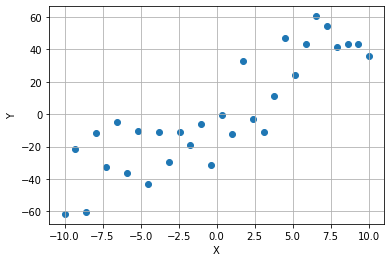

In [11]:
# Defining Values
values = np.linspace(-10, 10, 30)
errors = (np.random.random(values.shape) * 2 - 1) * 30
result = 5 * values + errors

steps = np.linspace(0, 10, 100)

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(values, result)

plt.show()

In [12]:
# Defining Tensors
xt = tf.constant(values, tf.float32)
yt = tf.constant(result, tf.float32)
wt = tf.placeholder(tf.float32)

yt_pred = xt * wt

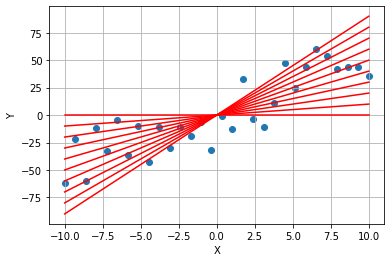

In [13]:
# Linear Regression
plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(values, result)
        
for w in range(10):
    x, y = sess.run((xt, yt_pred), {wt:w})
    plt.plot(x, y, color='red')

plt.show()

In [14]:
# Best Linear Regression
def plot_best():
    min_err = np.array(err).min()
    min_idx = err.index(min_err)
    min_w = steps[min_idx]

    plt.title(f'y = {min_w} * x')

    plt.grid(True)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.scatter(values, result)

    x, y = sess.run((xt, yt_pred), {wt:min_w})
    plt.plot(x, y, color='red')

    plt.show()

[28.46764, 27.99162, 27.51559, 27.039568, 26.563545, 26.08752, 25.611494, 25.137917, 24.706013, 24.274107, 23.842203, 23.410295, 22.97839, 22.546488, 22.11458, 21.721783, 21.343285, 20.964788, 20.58629, 20.20779, 19.847637, 19.50397, 19.160303, 18.821531, 18.540562, 18.25959, 17.978619, 17.697649, 17.41668, 17.1524, 16.922514, 16.692627, 16.462746, 16.23286, 16.002975, 15.77309, 15.568558, 15.406013, 15.243468, 15.080922, 14.918379, 14.755833, 14.593287, 14.430743, 14.268196, 14.141081, 14.027298, 13.983251, 13.983251, 13.983252, 13.9968815, 14.0549345, 14.113002, 14.2244625, 14.335922, 14.44738, 14.558841, 14.670301, 14.781759, 14.895166, 15.013591, 15.135396, 15.359491, 15.584734, 15.809974, 16.035215, 16.260456, 16.485697, 16.710938, 16.936178, 17.198475, 17.48177, 17.76506, 18.048355, 18.365856, 18.737387, 19.10892, 19.48045, 19.851982, 20.223515, 20.595043, 20.966576, 21.338108, 21.70964, 22.081167, 22.452702, 22.824232, 23.195765, 23.567299, 23.938826, 24.310356, 24.68189, 25.087

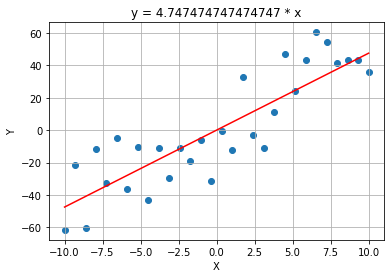

In [15]:
# Mean Absolute Error
def mae(yt, yt_pred):
    return tf.reduce_sum(tf.abs(yt - yt_pred)) / tf.cast(tf.size(yt), tf.float32)

err = []
for w in steps:
    # error = tf.keras.losses.MAE(yt, yt_pred)
    error = mae(yt, yt_pred)
    err.append(sess.run(error, {wt:w}))

print(err)

plot_best()

[1145.8314, 1110.8485, 1076.5928, 1043.0641, 1010.26263, 978.18823, 946.8409, 916.22064, 886.3275, 857.16156, 828.7228, 801.011, 774.02637, 747.7688, 722.23846, 697.4352, 673.359, 650.00995, 627.38794, 605.4931, 584.32544, 563.88477, 544.1713, 525.1849, 506.9256, 489.39346, 472.58844, 456.5105, 441.1597, 426.53598, 412.6394, 399.46988, 387.02753, 375.3123, 364.32416, 354.0631, 344.52917, 335.72238, 327.64273, 320.2902, 313.66473, 307.76636, 302.59512, 298.15103, 294.43396, 291.44412, 289.1813, 287.64566, 286.8371, 286.75568, 287.4013, 288.7741, 290.87402, 293.70102, 297.25516, 301.53638, 306.54474, 312.28024, 318.7428, 325.93246, 333.8493, 342.49323, 351.86426, 361.96243, 372.78763, 384.34003, 396.61945, 409.6261, 423.3598, 437.8206, 453.00858, 468.92358, 485.56583, 502.93506, 521.0315, 539.8549, 559.40564, 579.6833, 600.6882, 622.4201, 644.8791, 668.06525, 691.9787, 716.6192, 741.98645, 768.0812, 794.903, 822.452, 850.7279, 879.73083, 909.4611, 939.9185, 971.10297, 1003.0142, 1035.653

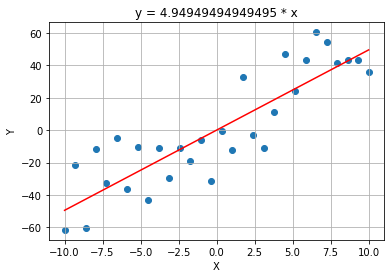

In [16]:
# Mean Square Error
def mse(yt, yt_pred):
    return tf.reduce_sum((yt - yt_pred) ** 2) / tf.cast(tf.size(yt), tf.float32)

err = []
for w in steps:
    # error = tf.keras.losses.MSE(yt, yt_pred)
    error = mse(yt, yt_pred)
    err.append(sess.run(error, {wt:w}))

print(err)

plot_best()

[1.0003983, 0.96985555, 0.93994766, 0.91067463, 0.8820364, 0.854033, 0.8266644, 0.7999306, 0.7738316, 0.7483675, 0.7235382, 0.69934374, 0.6757841, 0.6528592, 0.6305693, 0.6089142, 0.58789384, 0.5675083, 0.54775757, 0.5286417, 0.5101607, 0.4923145, 0.4751031, 0.4585265, 0.44258475, 0.42727783, 0.4126058, 0.3985685, 0.38516608, 0.3723985, 0.3602657, 0.3487677, 0.33790457, 0.3276763, 0.3180828, 0.3091241, 0.3008003, 0.29311126, 0.2860571, 0.27963778, 0.27385324, 0.26870352, 0.26418865, 0.2603086, 0.25706333, 0.25445297, 0.25247735, 0.2511366, 0.25043067, 0.2503596, 0.25092328, 0.25212184, 0.25395525, 0.2564234, 0.25952646, 0.26326427, 0.26763695, 0.2726445, 0.27828678, 0.28456393, 0.29147592, 0.29902273, 0.30720434, 0.31602082, 0.32547206, 0.33555818, 0.34627905, 0.35763484, 0.36962542, 0.38225082, 0.3955111, 0.4094061, 0.423936, 0.43910068, 0.45490026, 0.47133458, 0.48840383, 0.50610775, 0.52444667, 0.54342026, 0.56302863, 0.583272, 0.60415024, 0.6256632, 0.6478108, 0.6705935, 0.69401103

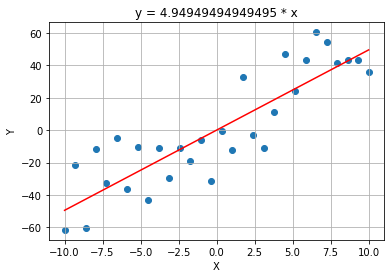

In [17]:
# R²
def r_squared(yt, yt_pred):
    residual = tf.reduce_sum((yt - yt_pred) ** 2)
    total = tf.reduce_sum((yt - tf.reduce_mean(yt)) ** 2)
    return residual / total

err = []
for w in steps:
    error = r_squared(yt, yt_pred)
    err.append(sess.run(error, {wt:w}))

print(err)

plot_best()

In [120]:
# closing session
sess.close()